In [1]:
from utility.clean_data_func import clean_and_filter_data
import re

def remove_special_characters(text):
    """Removes special characters from a text string."""
    pattern = r"[^\w\s]"  # Keep alphanumeric characters and whitespace
    return re.sub(pattern, "", text)


def lowercase(text):
    """Converts a text string to lowercase."""
    return text.lower()


# Clean data
print("Clean data")
df = clean_and_filter_data("./utility/azarbeijan-reviews.csv")
df["content"] = df["content"].apply(remove_special_characters)
df["content"] = df["content"].apply(lowercase)

Clean data
                                             content  score  upvotes
0                                          Çox qəşəy      5        0
1  Men niye nomre ile qeydiyatdan kece bilmirem.....      1        0
2  Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...      5        0
3                                          cox gözəl      5        1
4  Xaiş edirem bu problemi hell edinde həftədə 2 ...      5        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127537 entries, 0 to 127536
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  127534 non-null  object
 1   score    127537 non-null  int64 
 2   upvotes  127537 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ MB
None
content    3
score      0
upvotes    0
dtype: int64


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data
texts = df['content']  # Assuming 'content' is your column with text data

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit to top 10000 features
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)


In [3]:
from sklearn.decomposition import TruncatedSVD

# Number of components to keep
n_components = 100  # You can adjust this based on your specific needs

# Apply SVD
svd = TruncatedSVD(n_components=n_components)
svd_features = svd.fit_transform(tfidf_matrix)

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Prepare labels based on the 'score' column
labels = df['score'].apply(lambda x: 1 if x >= 4 else 0).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(svd_features, labels, test_size=0.2, random_state=42)

# Define a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_dim=n_components),
    Dropout(0.5),
    Dense(1, activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/Users/hasaneke/.pyenv/versions/3.12.0/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.8179 - loss: 0.6512 - val_accuracy: 0.8139 - val_loss: 0.4300
Epoch 2/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8221 - loss: 0.4303 - val_accuracy: 0.8236 - val_loss: 0.4231
Epoch 3/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8290 - loss: 0.4186 - val_accuracy: 0.8272 - val_loss: 0.4192
Epoch 4/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8277 - loss: 0.4235 - val_accuracy: 0.8265 - val_loss: 0.4206
Epoch 5/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.8251 - loss: 0.4162 - val_accuracy: 0.8262 - val_loss: 0.4375
Epoch 6/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8255 - loss: 0.4176 - val_accuracy: 0.8269 - val_loss: 0.4378
Epoch 7/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.8274 - loss: 0.4140 - val_accuracy: 0.8294 - val_loss: 0.4166
Epoch 8/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8303 - loss: 0.4122 - val_accurac

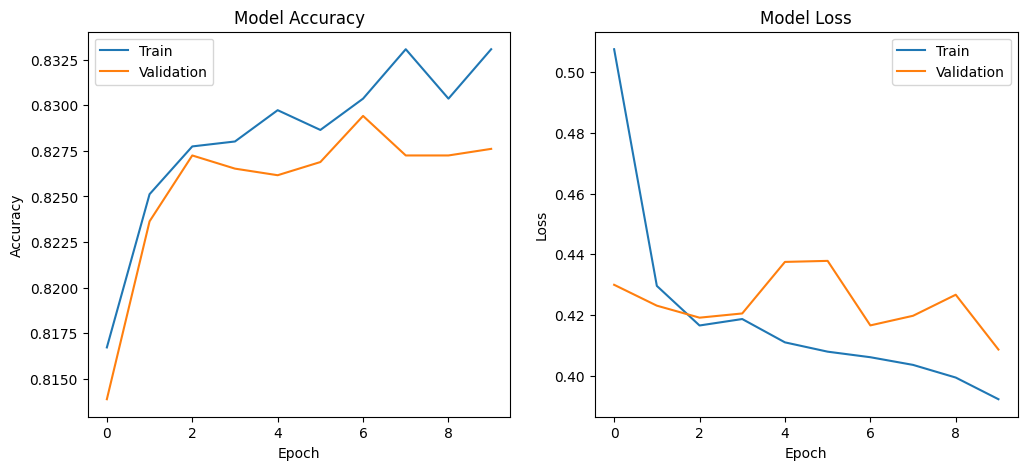

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()